In [1]:
import numpy as np
import pandas as pd

GRID = 'grid'
MG = 'mg'
SHS = 'shs'
ELECTRIFICATION_OPTIONS = [GRID, MG, SHS]
BAU_SCENARIO = 'bau'
SE4ALL_SCENARIO = 'se4all'
SE4ALL_FLEX_SCENARIO = 'se4all_shift'
PROG_SCENARIO = 'prog'
SCENARIOS = [BAU_SCENARIO, SE4ALL_SCENARIO, PROG_SCENARIO]

# Names for display
SCENARIOS_DICT = {
    BAU_SCENARIO: 'BaU',
    SE4ALL_SCENARIO: 'SE4All',
    PROG_SCENARIO: 'prOG',
}

ELECTRIFICATION_DICT = {
    GRID: 'Grid',
    MG: 'Mini Grid',
    SHS: 'Solar Home System'
}

# column names of the exogenous results
POP_GET = ['pop_get_%s_2030' % opt for opt in ELECTRIFICATION_OPTIONS]
HH_GET = ['hh_get_%s_2030' % opt for opt in ELECTRIFICATION_OPTIONS]
HH_CAP = ['hh_%s_capacity' % opt for opt in ELECTRIFICATION_OPTIONS]
HH_SCN2 = ['hh_cap_scn2_%s_capacity' % opt for opt in ELECTRIFICATION_OPTIONS]
INVEST = ['%s_investment_cost' % opt for opt in ELECTRIFICATION_OPTIONS]
INVEST_CAP = ['tier_capped_%s_investment_cost' % opt for opt in ELECTRIFICATION_OPTIONS]
GHG = ['ghg_%s_2017' % opt for opt in [GRID, MG]] + ['ghg_%s_2030' % opt for opt in ELECTRIFICATION_OPTIONS] + ['ghg_grid_cumul', 'ghg_mg_cumul']
GHG_CAP = ['tier_capped_ghg_%s_2030' % opt for opt in ELECTRIFICATION_OPTIONS]
EXO_RESULTS = POP_GET + HH_GET + HH_CAP + HH_SCN2 + INVEST + INVEST_CAP + GHG + GHG_CAP

# source http://www.worldbank.org/content/dam/Worldbank/Topics/Energy%20and%20Extract/
# Beyond_Connections_Energy_Access_Redefined_Exec_ESMAP_2015.pdf
MIN_TIER_LEVEL = 3
MIN_RATED_CAPACITY = {1: 3, 2: 50, 3: 200, 4: 800, 5: 2000}  # index is TIER level [W]
MIN_ANNUAL_CONSUMPTION = {1: 4.5, 2: 73, 3: 365, 4: 1250, 5: 3000}  # index is TIER level [kWh/a]
RATIO_CAP_CONSUMPTION = {}

# Investment Cost Source: Arranz and Worldbank,
# BENCHMARKING STUDY OF SOLAR PV MINIGRIDS INVESTMENT COSTS, 2017 (Jabref)
# unit is USD per household
MEDIAN_INVESTMENT_COST = {1: 742, 2: 1273, 3: 2516, 4: 5277, 5: 5492}

# drives for the socio-economic model
IMPACT_FACTORS = pd.DataFrame(
    {
        MG: [3, 13. / 6, 19. / 6, 3.25, 11. / 3],
        SHS: [23. / 12, 4.5, 37. / 12, 17. / 6, 41. / 12],
        'labels': [
            'high_gdp',
            'high_mobile_money',
            'high_ease_doing_business',
            'low_corruption',
            'high_grid_weakness'
        ]
    }
)
IMPACT_FACTORS = IMPACT_FACTORS.set_index('labels')

MENTI_DRIVES = ['gdp', 'mobile_money', 'ease_doing_business', 'corruption', 'weak_grid']

# $RT_shift_factors.$P$2
WEIGHT_MENTIS = 0.2
# -->WEIGHT_GRID = 0.8 ($RT_shift_factors.$O$2)  and  WEIGHT_GRID = 1 - WEIGHT_MENTIS
RISE_INDICES = ['rise_%s' % opt for opt in ELECTRIFICATION_OPTIONS]
SHIFT_MENTI = ['shift_menti_mg', 'shift_menti_shs']

BASIC_ROWS = [
    'People share',
    'People (k)',
    'HH (k)',
    'HH cap. (MW)',
    'HH cap. (MW) (TIER + 1)',
    'Investment MUSD',
    'Investment (TIER + 1) MUSD',
]
# labels of the columns of the result tables
LABEL_COLUMNS = ELECTRIFICATION_DICT.copy()
# a column for the row labels
LABEL_COLUMNS['labels'] = ''
LABEL_COLUMNS['total'] = 'Total'
BASIC_COLUMNS_ID = ['labels'] + ELECTRIFICATION_OPTIONS + ['total']
GHG_COLUMNS_ID = ['labels'] + ELECTRIFICATION_OPTIONS + ['total']
COMPARE_COLUMNS_ID = ['labels']
for opt in ELECTRIFICATION_OPTIONS + ['total']:
    COMPARE_COLUMNS_ID.append(opt)
    COMPARE_COLUMNS_ID.append('comp_{}'.format(opt))


In [ ]:
from data.data_preparation import compute_ndc_results_from_raw_data, EXO_RESULTS
for sce in SCENARIOS:
    df = compute_ndc_results_from_raw_data(sce, MIN_TIER_LEVEL)
    
    df = df[EXO_RESULTS].sum(axis=0)
    print(sce)
    print(df)
    df.to_csv('NDC_results_{}.csv'.format(sce))

In [ ]:
from data.data_preparation import SHS_SALES_VOLUMES, SHS_POWER_CATEGORIES, SHS_AVERAGE_INVESTMENT_COST

In [ ]:
SHS_SALES_VOLUMES

In [ ]:
SHS_AVERAGE_INVESTMENT_COST
shs_costs = pd.read_csv('data/shs_power_investment_cost.csv', comment='#')
shs_costs

## Test TIER level attribution

In [ ]:
from data_preparation import _find_tier_level

for hh_cons in np.array([1, 50, 100, 400, 2000, 5000]):
    print(_find_tier_level(hh_cons, 2))

In [ ]:
from data_preparation import _slope_capacity_vs_yearly_consumption
RATIO_CAP_CONSUMPTION = {}
TIER_LEVELS = [1, 2, 3, 4, 5]
for tier_lvl in [1, 2, 3, 4]:
    RATIO_CAP_CONSUMPTION[tier_lvl] = _slope_capacity_vs_yearly_consumption(tier_lvl)
RATIO_CAP_CONSUMPTION

In [ ]:
MIN_RATED_CAPACITY = {1: 3, 2: 50, 3: 200, 4: 800, 5: 2000}  # index is TIER level [W]
MIN_ANNUAL_CONSUMPTION = {1: 4.5, 2: 73, 3: 365, 4: 1250, 5: 3000}  # index is TIER level [kWh/a]

In [ ]:
for tier_lvl in TIER_LEVELS:
    print(MIN_RATED_CAPACITY[tier_lvl] / MIN_ANNUAL_CONSUMPTION[tier_lvl])

In [ ]:
cap = [MIN_RATED_CAPACITY[i] for i in TIER_LEVELS]
df = pd.DataFrame(cap)
df[0].plot()

In [ ]:
cons = [MIN_ANNUAL_CONSUMPTION[i] for i in TIER_LEVELS]
df = pd.DataFrame(cons)
df[0].plot()

In [ ]:
from data_preparation import IMPACT_FACTORS
IMPACT_FACTORS.index.to_list()

In [ ]:
for opt in [MG, SHS]:
    for input_name in IMPACT_FACTORS.index.to_list():
        #print("Input('impact-{}-{}-input', 'value'),".format(opt, input_name.replace('_', '-')))
        print('impact_{}_{},'.format(opt, input_name.replace('high', '')))



# Tests of the model

In [3]:
from data.data_preparation import compute_ndc_results_from_raw_data
SCENARIOS_DATA = {
    sce: compute_ndc_results_from_raw_data(sce, MIN_TIER_LEVEL).to_json() for sce in SCENARIOS
}

In [ ]:
se_df = pd.read_json(SCENARIOS_DATA[SE4ALL_SCENARIO])

In [ ]:
a = se_df[POP_GET ]
a['summe'] = a.sum(axis=1)
a['tot'] = se_df['pop_newly_electrified_2030']
a['diffe'] = a.tot.values - a.summe.values
a.loc[a.diffe > 5e-9]
a[POP_GET] = a[POP_GET].div(se_df.pop_newly_electrified_2030, axis=0)
a['summe'] = a[POP_GET].sum(axis=1)
a

In [ ]:
from data.data_preparation import compute_ndc_results_from_raw_data
for sce in SCENARIOS:
    df = compute_ndc_results_from_raw_data(sce, MIN_TIER_LEVEL)
    
    df = df[EXO_RESULTS].sum(axis=0)
    print(sce)
    print(df)
    df.to_csv('NDC_results_{}.csv'.format(sce))

In [ ]:
xls_bau = pd.read_csv('data/xls_bau.csv', float_precision='high')
xls_se = pd.read_csv('data/xls_se.csv', float_precision='high')
xls_prog = pd.read_csv('data/xls_prog.csv', float_precision='high')

invest_bau = pd.read_csv('data/invest_bau.csv', float_precision='high')
invest_se = pd.read_csv('data/invest_se.csv', float_precision='high')
invest_prog = pd.read_csv('data/invest_prog.csv', float_precision='high')

## Test Exogenous results

### BaU

In [ ]:
bau_df = pd.read_json(SCENARIOS_DATA[BAU_SCENARIO]).set_index('country_iso').sort_index(ascending=True)
xls_bau = pd.read_csv('data/xls_bau.csv', float_precision='high')

COMP_COLS = POP_GET + HH_GET + HH_CAP + HH_SCN2

df_diff = xls_bau[COMP_COLS] - bau_df[COMP_COLS]

def highlight_mismatch(col, eps=0.2):
    return df_diff.loc[np.abs(df_diff[col]) > eps]

l = []
for col in COMP_COLS:
    temp = highlight_mismatch(col).index.to_list()
    if temp:
        print('problems with ', col, temp)
        print(len(temp))
    l = l + temp
len(set(l))
l = list(set(l))
df_diff.loc[l]

### SE4ALL

In [ ]:
se_df = pd.read_json(SCENARIOS_DATA[SE4ALL_SCENARIO]).set_index('country_iso').sort_index(ascending=True)
xls_se = pd.read_csv('data/xls_se.csv', float_precision='high').set_index('country_iso').sort_index(ascending=True)

COMP_COLS = POP_GET + HH_GET + HH_CAP + HH_SCN2

df_diff = xls_se[COMP_COLS] - se_df[COMP_COLS]

def highlight_mismatch(col, eps=0.001):
    return df_diff.loc[np.abs(df_diff[col]) > eps]

l = []
for col in COMP_COLS:
    temp = highlight_mismatch(col).index.to_list()
    if temp:
        print('problems with ', col, temp)
        print(len(temp))
    l = l + temp
len(set(l))
l = list(set(l))
df_diff.loc[l]


### prOG

In [ ]:
xls_prog = pd.read_csv('data/xls_prog.csv', float_precision='high')
prog_df = pd.read_json(SCENARIOS_DATA[PROG_SCENARIO]).set_index('country_iso').sort_index(ascending=True)


COMP_COLS = POP_GET + HH_GET + HH_CAP + HH_SCN2

df_diff = xls_prog[COMP_COLS] - prog_df[COMP_COLS]

def highlight_mismatch(col, eps=0.2):
    return df_diff.loc[np.abs(df_diff[col]) > eps]

l = []
for col in COMP_COLS:
    temp = highlight_mismatch(col).index.to_list()
    if temp:
        print('problems with ', col, temp)
        print(len(temp))
    l = l + temp
len(set(l))
l = list(set(l))
df_diff.loc[l]

## Test GHG

### BaU

In [ ]:
bau_df = pd.read_json(SCENARIOS_DATA[BAU_SCENARIO]).set_index('country_iso').sort_index(ascending=True)
ghg_bau = pd.read_csv('data/ghg_bau.csv', float_precision='high').set_index('country_iso').sort_index(ascending=True)

COMP_COLS = GHG + GHG_CAP

df_diff = ghg_bau[COMP_COLS] - bau_df[COMP_COLS]

def highlight_mismatch(col, eps=40):
    return df_diff.loc[np.abs(df_diff[col]) > eps]

l = []
for col in COMP_COLS:
    temp = highlight_mismatch(col).index.to_list()
    if temp:
        print('problems with ', col, temp)
        print(len(temp))
    l = l + temp
len(set(l))
l = list(set(l))
df_diff.loc[l]

### SE4All

In [ ]:
se_df = pd.read_json(SCENARIOS_DATA[SE4ALL_SCENARIO]).set_index('country_iso').sort_index(ascending=True)
ghg_se = pd.read_csv('data/ghg_se.csv', float_precision='high').set_index('country_iso').sort_index(ascending=True)

COMP_COLS = GHG + GHG_CAP

df_diff = ghg_se[COMP_COLS] - se_df[COMP_COLS]

def highlight_mismatch(col, eps=40):
    return df_diff.loc[np.abs(df_diff[col]) > eps]

l = []
for col in COMP_COLS:
    temp = highlight_mismatch(col).index.to_list()
    if temp:
        print('problems with ', col, temp)
        print(len(temp))
    l = l + temp
len(set(l))
l = list(set(l))
df_diff.loc[l]

## Saved from BaU

In [ ]:
bau_df = pd.read_json(SCENARIOS_DATA[BAU_SCENARIO]).set_index('country_iso').sort_index(ascending=True)
se_df = pd.read_json(SCENARIOS_DATA[SE4ALL_SCENARIO]).set_index('country_iso').sort_index(ascending=True)

COMP_COLS = GHG + GHG_CAP

saved_se_df = bau_df[COMP_COLS] - se_df[COMP_COLS]


### prOG

In [ ]:
prog_df = pd.read_json(SCENARIOS_DATA[PROG_SCENARIO]).set_index('country_iso').sort_index(ascending=True)
ghg_prog = pd.read_csv('data/ghg_prog.csv', float_precision='high').set_index('country_iso').sort_index(ascending=True)

COMP_COLS = GHG + GHG_CAP

df_diff = ghg_prog[COMP_COLS] - prog_df[COMP_COLS]

def highlight_mismatch(col, eps=40):
    return df_diff.loc[np.abs(df_diff[col]) > eps]

l = []
for col in COMP_COLS:
    temp = highlight_mismatch(col).index.to_list()
    if temp:
        print('problems with ', col, temp)
        print(len(temp))
    l = l + temp
len(set(l))
l = list(set(l))
df_diff.loc[l]

## Test Investment cost

### BaU

In [ ]:
bau_df = pd.read_json(SCENARIOS_DATA[BAU_SCENARIO]).set_index('country_iso').sort_index(ascending=True)
invest_bau = pd.read_csv('data/invest_bau.csv', float_precision='high').set_index('country_iso').sort_index(ascending=True)

COMP_COLS = INVEST + INVEST_CAP

df_diff = invest_bau[COMP_COLS] - bau_df[COMP_COLS]

def highlight_mismatch(col, eps=40):
    return df_diff.loc[np.abs(df_diff[col]) > eps]

l = []
for col in COMP_COLS:
    temp = highlight_mismatch(col).index.to_list()
    if temp:
        print('problems with ', col, temp)
        print(len(temp))
    l = l + temp
len(set(l))
l = list(set(l))
df_diff.loc[l]

### SE4All

In [ ]:
se_df = pd.read_json(SCENARIOS_DATA[SE4ALL_SCENARIO]).set_index('country_iso').sort_index(ascending=True)
invest_se = pd.read_csv('data/invest_se.csv', float_precision='high').set_index('country_iso').sort_index(ascending=True)

COMP_COLS = INVEST + INVEST_CAP

df_diff = invest_se[COMP_COLS] - se_df[COMP_COLS]

def highlight_mismatch(col, eps=20):
    return df_diff.loc[np.abs(df_diff[col]) > eps]

l = []
for col in COMP_COLS:
    temp = highlight_mismatch(col).index.to_list()
    if temp:
        print('problems with ', col, temp)
        print(len(temp))
    l = l + temp
len(set(l))
l = list(set(l))
df_diff.loc[l]

### prOG

In [ ]:
prog_df = pd.read_json(SCENARIOS_DATA[PROG_SCENARIO]).set_index('country_iso').sort_index(ascending=True)
invest_prog = pd.read_csv('data/invest_prog.csv', float_precision='high').set_index('country_iso').sort_index(ascending=True)

COMP_COLS = INVEST + INVEST_CAP

df_diff = invest_prog[COMP_COLS] - prog_df[COMP_COLS]

def highlight_mismatch(col, eps=40):
    return df_diff.loc[np.abs(df_diff[col]) > eps]

l = []
for col in COMP_COLS:
    temp = highlight_mismatch(col).index.to_list()
    if temp:
        print('problems with ', col, temp)
        print(len(temp))
    l = l + temp
len(set(l))
l = list(set(l))
df_diff.loc[l]

# Rise shifts for electrification option

$i \in $ (grid, mg, shs)

$N_i$ : population getting option $i$ in 2030

$R_i$ : RISE score for the option $i$

$\delta_{ij} = R_i - R_j$

$\Delta_i = \frac{\sum_j \delta_ij}{\sum R_k} $

$\Delta N_i = \Delta_i (\sum_j N_j)$

Constraint is that $\sum_j \Delta N_j$

## Bulk case
$R_i \neq 0$, $\forall i$

$N_i - \Delta N_i > 0$, $\forall i$

In [ ]:
df = pd.DataFrame(data=[[90,95,55], [30, 20, 55], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], columns=ELECTRIFICATION_OPTIONS)
df.iloc[2] = df.iloc[1]/ df.iloc[1].sum()
df.iloc[3, 0] = (df.iloc[0].grid - df.iloc[0].mg) + (df.iloc[0].grid - df.iloc[0].shs)
df.iloc[3, 1] = (df.iloc[0].mg - df.iloc[0].grid) + (df.iloc[0].mg - df.iloc[0].shs)
df.iloc[3, 2] = (df.iloc[0].shs  - df.iloc[0].mg ) + (df.iloc[0].shs  - df.iloc[0].grid)

df.iloc[3] = df.iloc[3] / df.iloc[0].sum()

for j in range(3):
    df.iloc[4, j] = df.iloc[1].sum() * df.iloc[3,j]
    df.iloc[5, j] = df.iloc[4, j] / df.iloc[1,j]
    df.iloc[6, j] = df.iloc[1, j] + df.iloc[4, j]

df['sum'] = df.sum(axis=1)
df['labels'] = ['R_i', 'N_i' ,'n_i', 'Delta_i', 'Delta N_i', 'Delta N_i / N_i', 'Delta N_i + N_i']
df

## Limit case
$R_i \neq 0$, $\forall i$

$N_i - \Delta N_i < 0$,  for some $i$

if $N_i - \Delta N_i < 0$,  for one $i$ ([90,10,45], [30, 40, 30]), then we take $\Delta N_i = N_i \Delta_i < 0$ for this $i$ and we split this value between the $j$ for which $N_j - \Delta N_j > 0$, with the weight $\frac{R_j}{\sum_{k \neq i} R_k}$. That way we don't over-penalize

if $N_i - \Delta N_i < 0$,  for two $i$ ([90,10,15], [30, 40, 5]), then we take $\Delta N_i = N_i \Delta_i < 0$ for these $i$ and we add their  absolute sum to the $j$ for which $N_j - \Delta N_j > 0$. That way we don't over-penalize


The case ([90,10,45], [30, 700, 30]) penalize the R3 = 45 more than the R2=20 which is wrong, this is a limiting case to explore, maybe the solution would be to still penalize according to the initial $\Delta_{ij}$ (ie if $\Delta_{ij}$ < 0), then one must nevertheless be penalized, although it might be small and not have the penalty of the $i$ for which $N_i - \Delta N_i < 0$ redistributed equally among the remaining $j$

Maybe we want to cap the maximum value that can be given to a $N_i$ to be no larger than $N_i \Delta_i$, maybe not ?
between [90,5,55], [30, 600, 30] and [90,1,55], [30, 600, 30], the reward is dispoportionate in favor of R1 in first case

In [ ]:

def compute_rise_shifts(rise, pop_get, opt, flag=''):
    df = pd.DataFrame(
        data=[rise, pop_get, [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
        columns=ELECTRIFICATION_OPTIONS)

    df.iloc[2] = df.iloc[1] / df.iloc[1].sum()
    df.iloc[3, 0] = (df.iloc[0].grid - df.iloc[0].mg) + (df.iloc[0].grid - df.iloc[0].shs)
    df.iloc[3, 1] = (df.iloc[0].mg - df.iloc[0].grid) + (df.iloc[0].mg - df.iloc[0].shs)
    df.iloc[3, 2] = (df.iloc[0].shs - df.iloc[0].mg) + (df.iloc[0].shs - df.iloc[0].grid)

    df.iloc[3] = df.iloc[3] / df.iloc[0].sum()

    for j in range(3):
        df.iloc[4, j] = df.iloc[1].sum() * df.iloc[3, j]
        df.iloc[5, j] = df.iloc[4, j] / df.iloc[1, j]
        df.iloc[6, j] = df.iloc[1, j] + df.iloc[4, j]

    please_print = False

    diff = df.iloc[6].values
    diff = diff[diff < 0]
    if len(diff) == 2:
        # print('There are two differences smaller than 0')
        diff = df.iloc[6].values
        diff = diff[diff > 0]
        idx = df.iloc[6].to_list().index(diff[0])

        eps = 0
        for i in range(3):
            if i != idx:
                df.iloc[6, i] = df.iloc[1, i] * df.iloc[3, i]
                eps = eps + np.abs(df.iloc[6, i])
        df.iloc[6, idx] = eps

    elif len(diff) == 1:
        # print('one difference is smaller than 0')
        idx = df.iloc[6].to_list().index(diff[0])
        norm = 0
        idx2 = None
        # find out if there is another penalized case
        for i in range(3):
            if i != idx:
                if df.iloc[3, i] < 0:
                    idx2 = i
                norm = norm + df.iloc[0, i]

        if idx2 is None:
            # print('the difference will be fully split between the two other case')
            eps = df.iloc[1, idx]
            for i in range(3):
                if i == idx:
                    df.iloc[6, i] = -eps
                else:
                    df.iloc[6, i] = np.abs(eps) * df.iloc[0, i] / norm
        else:
            # print('one of the remaining should have a penalty')
            # this one cannot be larger that its population
            df.iloc[6, idx] = - df.iloc[1, idx]
            # this one becomes a part of the population from above, which compensates
            # a bit the penalty
            df.iloc[6, idx2] = df.iloc[4, idx2] + np.abs(df.iloc[6, idx]) * df.iloc[
                0, idx2] / norm
            # the highest score receives the penalty
            for i in range(3):
                if i != idx and i != idx2:
                    df.iloc[6, i] = np.abs(df.iloc[4, idx2]) + np.abs(df.iloc[6, idx]) * \
                                    df.iloc[0, i] / norm

    elif len(df) == 3:
        print('error, all differences are negative')
    else:
        print('no difference is smaller than 0')
        correct = False

        # check if any Delta_i < 0
        diff = df.iloc[3].values
        diff = diff[diff < 0]
        if len(diff) == 1:
            correct = True
            print('Only one should be penalized')
            print('The difference will be fully split between the two other case')
            idx = df.iloc[3].to_list().index(diff[0])
            norm = 0
            for i in range(3):
                if i != idx:
                    norm = norm + df.iloc[0, i]

            eps = df.iloc[4, idx]
            for i in range(3):
                if i == idx:
                    df.iloc[6, i] = eps
                else:
                    df.iloc[6, i] = np.abs(eps) * df.iloc[0, i] / norm

                    # ----
        elif len(diff) == 2:
            print('Two should be penalized')
            df.iloc[6] = df.iloc[4]
        elif len(diff) == 3:
            print('error, all deltas are negative')
        else:
            # case when all RISE are equal
            print('error, all deltas are positive or zero')
            please_print = True

    df.iloc[7] = df.iloc[6] + df.iloc[1]
    for i in range(3):
        df.iloc[5, i] = df.iloc[6, i] / df.iloc[1, i]



    df['sum'] = df.sum(axis=1)

    df['labels'] = ['R_i', 'N_i', 'n_i', 'Delta_i', 'Delta N_i', 'Delta N_i / N_i (case 2)',
                        'Delta N_i (case 2)', 'Delta N_i + N_i (case 2)']

    return df
    #return df.iloc[6, ELECTRIFICATION_OPTIONS.index(opt)]

df = pd.read_json(SCENARIOS_DATA[SE4ALL_SCENARIO]).set_index('country_iso')
    
    
a = compute_rise_shifts([16.67,  35,  32], [3.9198e+07,  1.75457e+07,  4.09613e+07], 0)
# [16.67,  35,  22.22]
# [7.62143e+06,  5.86826e+07,  3.1401e+07]
#b = pd.DataFrame(data=[[0, 2, 0], [1, 0, 0], [0, 0, 0], [0, -3, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
#        columns=['a', 'b', 'c'])
#a.merge(b)
#ENDO_POP_GET = ['endo_pop_get_%s_2030' % opt for opt in ELECTRIFICATION_OPTIONS]
#df.loc['NGA',ENDO_POP_GET]
a
#NOT THIS ONE!!!

In [58]:
def compute_rise_shifts(rise, pop_get, opt, flag=''):
    df = pd.DataFrame(
        data=[rise, pop_get, [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
        columns=ELECTRIFICATION_OPTIONS)

    please_print = True

    if df.iloc[0].sum() == 0:
        df.iloc[6] = df.iloc[0]
    else:
        df.iloc[2] = df.iloc[1] / df.iloc[1].sum()
        df.iloc[3, 0] = (df.iloc[0].grid - df.iloc[0].mg) + (df.iloc[0].grid - df.iloc[0].shs)
        df.iloc[3, 1] = (df.iloc[0].mg - df.iloc[0].grid) + (df.iloc[0].mg - df.iloc[0].shs)
        df.iloc[3, 2] = (df.iloc[0].shs - df.iloc[0].mg) + (df.iloc[0].shs - df.iloc[0].grid)

        df.iloc[3] = df.iloc[3] / df.iloc[0].sum()

        for j in range(3):
            df.iloc[4, j] = df.iloc[1].sum() * df.iloc[3, j]
            if df.iloc[1, j] != 0 :
                df.iloc[5, j] = df.iloc[4, j] / df.iloc[1, j]
            else:
                df.iloc[5, j] = np.nan
       
        df.iloc[6] = df.iloc[1] + df.iloc[4]
        diff = df.iloc[6].values
        print(diff)
        diff = diff[diff < 0]
        if len(diff) == 2:
            print('There are two differences smaller than 0')
            diff = df.iloc[6].values
            diff = diff[diff > 0]
            idx = df.iloc[6].to_list().index(diff[0])

            eps = 0
            for i in range(3):
                if i != idx:
                    df.iloc[6, i] = df.iloc[1, i] * df.iloc[3, i]
                    eps = eps + np.abs(df.iloc[6, i])
            df.iloc[6, idx] = eps

        elif len(diff) == 1:
            print('one difference is smaller than 0')
            idx = df.iloc[6].to_list().index(diff[0])
            norm = 0
            idx2 = None
            # find out if there is another penalized case
            for i in range(3):
                if i != idx:
                    if df.iloc[3, i] < 0:
                        idx2 = i
                    norm = norm + df.iloc[0, i]
                    
            if idx2 is None:
                print('the difference will be fully split between the two other case')
                # we take N_i Delta_i away from N_i and split it amongst the remaining
                # options
                eps = df.iloc[1, idx] * df.iloc[3, idx]
                for i in range(3):
                    if i == idx:
                        df.iloc[6, i] = eps
                    else:
                        df.iloc[6, i] = np.abs(eps) * df.iloc[0, i] / norm
            else:
                print('one of the remaining should have a penalty')
                
                eps = df.iloc[1, idx] * df.iloc[3, idx]
                
                # this one cannot be larger that its population
                df.iloc[6, idx] = eps
                # this one becomes a part of the population from above, which compensates
                # a bit the penalty
                df.iloc[6, idx2] = df.iloc[4, idx2] + np.abs(eps) * df.iloc[
                    0, idx2] / norm
                # the highest score receives the penalty
                for i in range(3):
                    if i != idx and i != idx2:
                        print(i)
                        df.iloc[6, i] = np.abs(df.iloc[4, idx2]) + np.abs(eps) * \
                                        df.iloc[0, i] / norm
                print(df.iloc[4])
        elif len(df) == 3:
            print('error, all differences are negative')
        else:
            print('no difference is smaller than 0')

            # check if any Delta_i < 0
            diff = df.iloc[3].values
            diff = diff[diff < 0]
            if len(diff) == 1:
                print('Only one should be penalized')
                print('The difference will be fully split between the two other case')
                idx = df.iloc[3].to_list().index(diff[0])
                norm = 0
                for i in range(3):
                    if i != idx:
                        norm = norm + df.iloc[0, i]

                eps = df.iloc[4, idx]
                for i in range(3):
                    if i == idx:
                        df.iloc[6, i] = eps
                    else:
                        df.iloc[6, i] = np.abs(eps) * df.iloc[0, i] / norm

                        # ----
            elif len(diff) == 2:
                df.iloc[6] = df.iloc[4]
                print('Two should be penalized')
            elif len(diff) == 3:
                print('error, all deltas are negative')
            else:
                # case when all RISE are equal
                print('error, all deltas are positive or zero')
                df.iloc[6] = df.iloc[4]
                please_print = True

        df.iloc[7] = df.iloc[6] + df.iloc[1]
        for i in range(3):
            if df.iloc[1, i] != 0 :
                df.iloc[5, i] = df.iloc[6, i] / df.iloc[1, i]
            else:
                df.iloc[5, i] = np.nan

    if df.iloc[6].sum() > 1e-6:

        print(
            'Error ({}): the sum of the shifts ({}) is not equal to zero!'.format(
                flag,
                df.iloc[6].sum(),
            )
        )
        please_print = True

    if please_print:
        print(flag)
        df['sum'] = df.sum(axis=1)

        df['labels'] = ['R_i', 'N_i', 'n_i', 'Delta_i', 'Delta N_i', 'Delta N_i / N_i (case 2)',
                        'Delta N_i (case 2)', 'Delta N_i + N_i (case 2)']
        #print(df)
        #print()
        #print()
    return df#df.iloc[6, ELECTRIFICATION_OPTIONS.index(opt)]
vals=np.arange(1,100,1)
#vals=[60]
y = {'grid_vs_x':[], 'mg_vs_x': [], 'shs_vs_x': []}
for x in vals:
    a = compute_rise_shifts([16.67,  35,  x], [3.9198e+07,  1.75457e+07,  4.09613e+07], 0)
    # [16.67,  35,  22.22]
    # [7.62143e+06,  5.86826e+07,  3.1401e+07]
    y['grid_vs_x'].append(a.iloc[7, 0])
    y['mg_vs_x'].append(a.iloc[7, 1])
    y['shs_vs_x'].append(a.iloc[7, 2])


[ 3.42635914e+07  1.14619986e+08 -5.11785775e+07]
one difference is smaller than 0
one of the remaining should have a penalty
1
grid   -4.934409e+06
mg      9.707429e+07
shs    -9.213988e+07
Name: 4, dtype: float64

[ 3.25350542e+07  1.10990784e+08 -4.58208381e+07]
one difference is smaller than 0
one of the remaining should have a penalty
1
grid   -6.662946e+06
mg      9.344508e+07
shs    -8.678214e+07
Name: 4, dtype: float64

[ 3.08697523e+07  1.07494349e+08 -4.06591015e+07]
one difference is smaller than 0
one of the remaining should have a penalty
1
grid   -8.328248e+06
mg      8.994865e+07
shs    -8.162040e+07
Name: 4, dtype: float64

[ 2.92642781e+07  1.04123527e+08 -3.56828054e+07]
one difference is smaller than 0
one of the remaining should have a penalty
1
grid   -9.933722e+06
mg      8.657783e+07
shs    -7.664411e+07
Name: 4, dtype: float64

[ 2.77154643e+07  1.00871669e+08 -3.08821330e+07]
one difference is smaller than 0
one of the remaining should have a penalty
1
grid   -

In [42]:
a = compute_rise_shifts([16.67,  80,  22.2], [3.9198e+07,  1.75457e+07,  4.09613e+07], 0)
a

There are two differences smaller than 0



,grid,mg,shs,sum,labels
0,1.667000e+01,8.000000e+01,2.220000e+01,1.188700e+02,R_i
1,3.919800e+07,1.754570e+07,4.096130e+07,9.770500e+07,N_i
2,4.011872e-01,1.795783e-01,4.192344e-01,1.000000e+00,n_i
3,-5.792883e-01,1.019012e+00,-4.397241e-01,5.551115e-17,Delta_i
4,-5.659936e+07,9.956260e+07,-4.296324e+07,7.450581e-09,Delta N_i
5,-5.792883e-01,2.320717e+00,-4.397241e-01,1.301705e+00,Delta N_i / N_i (case 2)
6,-2.270694e+07,4.071861e+07,-1.801167e+07,3.725290e-09,Delta N_i (case 2)
7,1.649106e+07,5.826431e+07,2.294963e+07,9.770500e+07,Delta N_i + N_i (case 2)


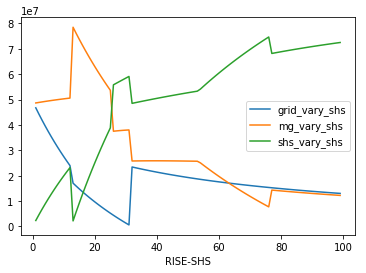

In [59]:
import matplotlib.pyplot as plt
plt.plot(vals,y['grid_vs_x'], label='grid_vary_shs')
plt.plot(vals,y['mg_vs_x'], label='mg_vary_shs')
plt.plot(vals,y['shs_vs_x'], label='shs_vary_shs')
plt.xlabel('RISE-SHS')
plt.legend()
plt.savefig('example_vary_shs_NGA.png')

In [ ]:
# Check that as one option gets completely depleted, the people are reaffected according to the respective RISE scores of the other two options 
thing=[]
for i in range(10):
    thing.append(np.append(i, compute_shifts([90,i,55], [30, 600, 30]).values[:3]))
things = np.vstack(thing)
pd.DataFrame(data=things, columns=['R_mg', 'Δ N_grid', 'Δ N_grid', 'Δ N_grid'])

In [ ]:
from data.data_preparation import compute_rise_shifts

compute_rise_shifts([1.000000e+02,  7.667000e+01,  6.889000e+01], [1.812061e+07,  9.759722e+07,  1.717494e+08],'grid', 'IND')


In [ ]:
df = pd.DataFrame(data=[[16.67,69.17,22.22], [4.268328e+06, 3.457142e+05, 9.163149e+06], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], columns=ELECTRIFICATION_OPTIONS)
df.iloc[2] = df.iloc[1]/ df.iloc[1].sum()
#df.iloc[3, 0] = (df.iloc[0].grid* df.iloc[2].grid - df.iloc[0].mg * df.iloc[2].mg) + (df.iloc[0].grid* df.iloc[2].grid - df.iloc[0].shs * df.iloc[2].shs)
#df.iloc[3, 1] = (df.iloc[0].mg * df.iloc[2].mg - df.iloc[0].grid* df.iloc[2].grid) + (df.iloc[0].mg * df.iloc[2].mg - df.iloc[0].shs * df.iloc[2].shs)
#df.iloc[3, 2] = (df.iloc[0].shs * df.iloc[2].shs - df.iloc[0].mg * df.iloc[2].mg) + (df.iloc[0].shs * df.iloc[2].shs - df.iloc[0].grid* df.iloc[2].grid)

df.iloc[3, 0] = (df.iloc[0].grid - df.iloc[0].mg) + (df.iloc[0].grid - df.iloc[0].shs)
df.iloc[3, 1] = (df.iloc[0].mg - df.iloc[0].grid) + (df.iloc[0].mg - df.iloc[0].shs)
df.iloc[3, 2] = (df.iloc[0].shs  - df.iloc[0].mg ) + (df.iloc[0].shs  - df.iloc[0].grid)

df.iloc[3] = df.iloc[3] / df.iloc[0].sum()

for j in range(3):
    df.iloc[4, j] = df.iloc[1].sum()*df.iloc[3,j]
print(df.iloc[2].sum())
print(df.iloc[3].sum())
print(df.iloc[4].sum())

df.iloc[5] = df.iloc[1] + df.iloc[4]

N = df.iloc[1,2] + df.iloc[4,2]
df.iloc[6,0] = N * df.iloc[0,0] / (df.iloc[0,0]+ df.iloc[0,1])
df.iloc[6,1] = N * df.iloc[0,1] / (df.iloc[0,0]+ df.iloc[0,1])
df.iloc[6,2] = -N

df.iloc[7] =  df.iloc[6] + df.iloc[4]

for j in range(3):
    df.iloc[6,j] = df.iloc[7,j] / df.iloc[1,j] 

df['sum'] = df.sum(axis=1)
df['labels'] = ['R_i', 'N_i' ,'n_i', 'Delta_i', 'Delta N_i', '+N_i', '+N_i', '']


df

In [ ]:
df = pd.DataFrame(data=[[90,90,65], [30, 20, 8], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], columns=ELECTRIFICATION_OPTIONS)
df.iloc[2] = df.iloc[1]/ df.iloc[1].sum()

df.iloc[3, 0] = (df.iloc[0].grid - df.iloc[0].mg) + (df.iloc[0].grid - df.iloc[0].shs)
df.iloc[3, 1] = (df.iloc[0].mg - df.iloc[0].grid) + (df.iloc[0].mg - df.iloc[0].shs)
df.iloc[3, 2] = (df.iloc[0].shs  - df.iloc[0].mg ) + (df.iloc[0].shs  - df.iloc[0].grid)

df.iloc[3] = df.iloc[3] / df.iloc[0].sum()

for j in range(3):
    df.iloc[4, j] = df.iloc[1].sum()*df.iloc[3,j]

df.iloc[5] = df.iloc[1] + df.iloc[4]

N = df.iloc[1,2] + df.iloc[4,2]
df.iloc[6,0] = N * df.iloc[0,0] / (df.iloc[0,0]+ df.iloc[0,1])
df.iloc[6,1] = N * df.iloc[0,1] / (df.iloc[0,0]+ df.iloc[0,1])
df.iloc[6,2] = -N

df.iloc[7] =  df.iloc[6] + df.iloc[4]

#for j in range(3):
#    df.iloc[6,j] = df.iloc[7,j] / df.iloc[1,j] 

df['sum'] = df.sum(axis=1)
df['labels'] = ['R_i', 'N_i' ,'n_i', 'Delta_i', 'Delta N_i', '+N_i', '+N_i', '']


df

In [ ]:
df = pd.DataFrame(data=[[90,70,70], [30, 20, 2], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], columns=ELECTRIFICATION_OPTIONS)
df.iloc[2] = df.iloc[1]/ df.iloc[1].sum()
#df.iloc[3, 0] = (df.iloc[0].grid* df.iloc[2].grid - df.iloc[0].mg * df.iloc[2].mg) + (df.iloc[0].grid* df.iloc[2].grid - df.iloc[0].shs * df.iloc[2].shs)
#df.iloc[3, 1] = (df.iloc[0].mg * df.iloc[2].mg - df.iloc[0].grid* df.iloc[2].grid) + (df.iloc[0].mg * df.iloc[2].mg - df.iloc[0].shs * df.iloc[2].shs)
#df.iloc[3, 2] = (df.iloc[0].shs * df.iloc[2].shs - df.iloc[0].mg * df.iloc[2].mg) + (df.iloc[0].shs * df.iloc[2].shs - df.iloc[0].grid* df.iloc[2].grid)

df.iloc[3, 0] = (df.iloc[0].grid - df.iloc[0].mg) + (df.iloc[0].grid - df.iloc[0].shs)
df.iloc[3, 1] = (df.iloc[0].mg - df.iloc[0].grid) + (df.iloc[0].mg - df.iloc[0].shs)
df.iloc[3, 2] = (df.iloc[0].shs  - df.iloc[0].mg ) + (df.iloc[0].shs  - df.iloc[0].grid)

df.iloc[3] = df.iloc[3] / df.iloc[0].sum()

for j in range(3):
    df.iloc[4, j] = df.iloc[1].sum()*df.iloc[3,j]
print(df.iloc[2].sum())
print(df.iloc[3].sum())
print(df.iloc[4].sum())

df.iloc[5] = df.iloc[1] + df.iloc[4]

N = df.iloc[1,2]
df.iloc[6,0] = df.iloc[1,2] - df.iloc[4,1]
df.iloc[6,1] = df.iloc[4,1]
df.iloc[6,2] = -N

df.iloc[7] =  df.iloc[6] + df.iloc[1]

#for j in range(3):
#    df.iloc[6,j] = df.iloc[7,j] / df.iloc[1,j] 

df['sum'] = df.sum(axis=1)
df['labels'] = ['R_i', 'N_i' ,'n_i', 'Delta_i', 'Delta N_i', '+N_i', '+N_i', '']


df

In [ ]:
df = pd.DataFrame(data=[[90,75,70], [30, 20, 2], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], columns=ELECTRIFICATION_OPTIONS)
df.iloc[2] = df.iloc[1]/ df.iloc[1].sum()
#df.iloc[3, 0] = (df.iloc[0].grid* df.iloc[2].grid - df.iloc[0].mg * df.iloc[2].mg) + (df.iloc[0].grid* df.iloc[2].grid - df.iloc[0].shs * df.iloc[2].shs)
#df.iloc[3, 1] = (df.iloc[0].mg * df.iloc[2].mg - df.iloc[0].grid* df.iloc[2].grid) + (df.iloc[0].mg * df.iloc[2].mg - df.iloc[0].shs * df.iloc[2].shs)
#df.iloc[3, 2] = (df.iloc[0].shs * df.iloc[2].shs - df.iloc[0].mg * df.iloc[2].mg) + (df.iloc[0].shs * df.iloc[2].shs - df.iloc[0].grid* df.iloc[2].grid)

df.iloc[3, 0] = (df.iloc[0].grid - df.iloc[0].mg) + (df.iloc[0].grid - df.iloc[0].shs)
df.iloc[3, 1] = (df.iloc[0].mg - df.iloc[0].grid) + (df.iloc[0].mg - df.iloc[0].shs)
df.iloc[3, 2] = (df.iloc[0].shs  - df.iloc[0].mg ) + (df.iloc[0].shs  - df.iloc[0].grid)

df.iloc[3] = df.iloc[3] / df.iloc[0].sum()

for j in range(3):
    df.iloc[4, j] = df.iloc[1].sum()*df.iloc[3,j]
print(df.iloc[2].sum())
print(df.iloc[3].sum())
print(df.iloc[4].sum())

df.iloc[5] = df.iloc[1] + df.iloc[4]

N = np.max([df.iloc[1,2] + df.iloc[4,2], -df.iloc[1,2]])
print(N)
print()
df.iloc[6,0] = N * df.iloc[0,0] / (df.iloc[0,0]+ df.iloc[0,1])
df.iloc[6,1] = N * df.iloc[0,1] / (df.iloc[0,0]+ df.iloc[0,1])
df.iloc[6,2] = -N
df.iloc[7] =  df.iloc[6] + df.iloc[4]

#for j in range(3):
#    df.iloc[6,j] = df.iloc[7,j] / df.iloc[1,j] 

df['sum'] = df.sum(axis=1)
df['labels'] = ['R_i', 'N_i' ,'n_i', 'Delta_i', 'Delta N_i', '+N_i', '+N_i', '']


df

Case where $\Delta N_i =  N_i \Delta_i$, then the rest $\varepsilon = \sum \Delta N_i = \sum_i N_i \Delta_i \neq 0$ is redistributed to the prorata of the $n_i$ --> $\Delta N'_i =  \Delta N_i - \varepsilon n_i$ such that $\sum \Delta' N_i = 0$

In [ ]:
df = pd.DataFrame(data=[[90,15,15], [30, 20, 10], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], columns=ELECTRIFICATION_OPTIONS)
df.iloc[2] = df.iloc[1]/ df.iloc[1].sum()

df.iloc[3, 0] = (df.iloc[0].grid - df.iloc[0].mg) + (df.iloc[0].grid - df.iloc[0].shs)
df.iloc[3, 1] = (df.iloc[0].mg - df.iloc[0].grid) + (df.iloc[0].mg - df.iloc[0].shs)
df.iloc[3, 2] = (df.iloc[0].shs  - df.iloc[0].mg ) + (df.iloc[0].shs  - df.iloc[0].grid)

df.iloc[3] = df.iloc[3] / df.iloc[0].sum()

for j in range(3):
    df.iloc[4, j] =  df.iloc[3,j] * df.iloc[1,j]#* df.iloc[1].sum()

eps = df.iloc[4].sum()
for j in range(3):
    df.iloc[5, j] = df.iloc[4,j] - eps * df.iloc[2,j]
    df.iloc[6, j] = df.iloc[5, j] / df.iloc[1,j]
    
df['sum'] = df.sum(axis=1)
df['labels'] = ['R_i', 'N_i' ,'n_i', 'Delta_i', 'Delta N_i', 'Delta N_i (case 2)', 'Delta N_i / N_i (case 2)']
df

In [ ]:
df = pd.DataFrame(data=[[78,15,15], [30, 10, 10], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], columns=ELECTRIFICATION_OPTIONS)
df.iloc[2] = df.iloc[1]/ df.iloc[1].sum()

df.iloc[3, 0] = (df.iloc[0].grid - df.iloc[0].mg) + (df.iloc[0].grid - df.iloc[0].shs)
df.iloc[3, 1] = (df.iloc[0].mg - df.iloc[0].grid) + (df.iloc[0].mg - df.iloc[0].shs)
df.iloc[3, 2] = (df.iloc[0].shs  - df.iloc[0].mg ) + (df.iloc[0].shs  - df.iloc[0].grid)

df.iloc[3] = df.iloc[3] / df.iloc[0].sum()
S = 0
for i in range(3):
    S = S + np.abs(df.iloc[3,i])
df.iloc[3] = df.iloc[3] / S
print(S)
for j in range(3):
    df.iloc[4, j] =  df.iloc[3,j] * df.iloc[1,j]#* df.iloc[1].sum()

eps = df.iloc[4].sum()
for j in range(3):
    df.iloc[5, j] = df.iloc[4,j] - eps * df.iloc[2,j]
    df.iloc[6, j] = df.iloc[5, j] / df.iloc[1,j]
    
df['sum'] = df.sum(axis=1)
df['labels'] = ['R_i', 'N_i' ,'n_i', 'Delta_i', 'Delta N_i', 'Delta N_i (case 2)', 'Delta N_i / N_i (case 2)']
df

The one with (0 and 1) make the weigth with a mix of $N_i R_i$ in the $\delta_{ij}$ instead of $R_i$, normalizes with product of the total sums

In [ ]:
df = pd.DataFrame(data=[[90,15,15], [30, 20, 10], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], columns=ELECTRIFICATION_OPTIONS)
df = pd.DataFrame(data=[[90,15,15], [30, 200, 200], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], columns=ELECTRIFICATION_OPTIONS)
df = pd.DataFrame(data=[[100,0,100], [30, 200, 10], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], columns=ELECTRIFICATION_OPTIONS)
df.iloc[2] = df.iloc[1]/ df.iloc[1].sum()

#df.iloc[3, 0] = (df.iloc[0].grid* df.iloc[1].grid - df.iloc[0].mg * df.iloc[1].mg) + (df.iloc[0].grid* df.iloc[1].grid - df.iloc[0].shs * df.iloc[1].shs)
#df.iloc[3, 1] = (df.iloc[0].mg * df.iloc[1].mg - df.iloc[0].grid* df.iloc[1].grid) + (df.iloc[0].mg * df.iloc[1].mg - df.iloc[0].shs * df.iloc[1].shs)
#df.iloc[3, 2] = (df.iloc[0].shs * df.iloc[1].shs - df.iloc[0].mg * df.iloc[1].mg) + (df.iloc[0].shs * df.iloc[1].shs - df.iloc[0].grid* df.iloc[1].grid)

#df.iloc[3, 0] = (df.iloc[0].grid* df.iloc[2].grid - df.iloc[0].mg * df.iloc[2].mg) + (df.iloc[0].grid* df.iloc[2].grid - df.iloc[0].shs * df.iloc[2].shs)
#df.iloc[3, 1] = (df.iloc[0].mg * df.iloc[2].mg - df.iloc[0].grid* df.iloc[2].grid) + (df.iloc[0].mg * df.iloc[2].mg - df.iloc[0].shs * df.iloc[2].shs)
#df.iloc[3, 2] = (df.iloc[0].shs * df.iloc[2].shs - df.iloc[0].mg * df.iloc[2].mg) + (df.iloc[0].shs * df.iloc[2].shs - df.iloc[0].grid* df.iloc[2].grid)

df.iloc[3, 0] = (df.iloc[0].grid - df.iloc[0].mg) * df.iloc[2].mg + (df.iloc[0].grid - df.iloc[0].shs) * df.iloc[2].shs
df.iloc[3, 1] = (df.iloc[0].mg - df.iloc[0].grid) * df.iloc[2].grid + (df.iloc[0].mg - df.iloc[0].shs) * df.iloc[2].shs
df.iloc[3, 2] = (df.iloc[0].shs  - df.iloc[0].mg ) * df.iloc[2].mg + (df.iloc[0].shs  - df.iloc[0].grid) * df.iloc[2].grid

norm = 0
for i in range(3):
    norm = norm + df.iloc[0, i] * df.iloc[1, i]

norm = df.iloc[0].sum() #* df.iloc[1].sum()    
print(norm)
df.iloc[3] = df.iloc[3] / norm

for j in range(3):
    df.iloc[4, j] =  df.iloc[3,j] * df.iloc[1,j]#* df.iloc[1].sum()

eps = df.iloc[4].sum()
for j in range(3):
    df.iloc[5, j] = df.iloc[4,j] - eps * df.iloc[2,j]
    df.iloc[6, j] = df.iloc[5, j] / df.iloc[1,j]
    
df['sum'] = df.sum(axis=1)
df['labels'] = ['R_i', 'N_i' ,'n_i', 'Delta_i', 'Delta N_i', 'Delta N_i (case 2)', 'Delta N_i / N_i (case 2)']
df